<a href="https://colab.research.google.com/github/FelipeMontLopes/Data_Science_Portfolio/blob/main/Volatilidade_Impl%C3%ADcita%20-%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mibian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for mibian: filename=mibian-0.1.3-py3-none-any.whl size=4039 sha256=1d9691a7c3392f3bbfd6d35002fdff6596cae23738840e665a2401c94b6ef463
  Stored in directory: /root/.cache/pip/wheels/bb/8e/88/9401e806f2eaf5d2f4e775e598c27d7cc09bfb06998d075093
Successfully built mibian


# A alma do Mercado

A volatilidade é simplismente a quantidade que o preço dos ativos flutua, sem levar em conta a dirção.

### Volatilidade: Hitórica e a Implicita



*   A **Volatilidade histórica** é "o desvio padrão anualizado dos movimentos anteriores dos preços das ações". Ou, mais simples, é o quant o preço das ações flutuou diariamente ao longo de um período de um anoo.

*   A **Volatilidade implícita** é o que o mercado está "implicando" que a volatilidade da ação será no futuro, com base nas mudanças de preço de uma opção. Também é expressa numa base anualizada. Mas a volatilidade implícita geralmente é mais interessante, poque é "voltada para o futuro".







https://www.barchart.com/futures/quotes/BTF23/options/jan-23 - Consulta Opções CME

Comparar com Deribit e Bybit

In [54]:
# Importando as bibliotecas

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import math as m

%matplotlib inline

# Para a VI

import mibian

#Parametros do modelo

Usando a biblioteca para o cálculo da IV

Da documentação:


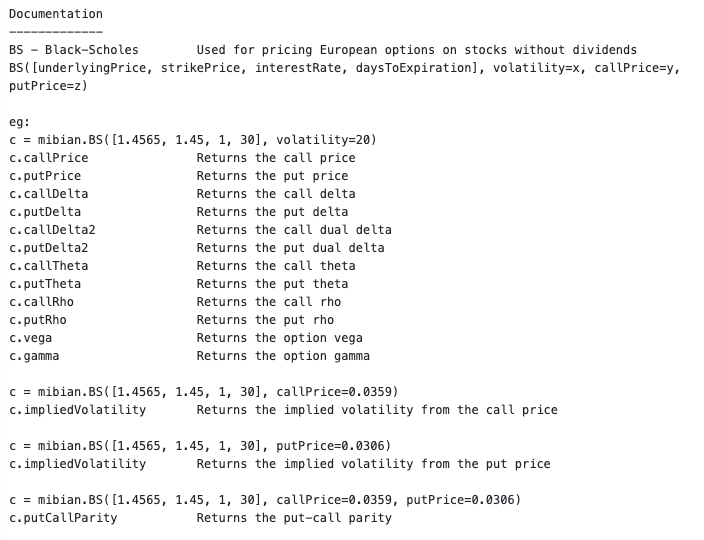



In [44]:
#parametros do modelo

ticker = "BTC-USD"
p = 22500 #Preço atual
s = 22500 #Stike
i = 4.5   #Taxa de Juros
e = 7     # 27/01/23 - 20/01/23

model = mibian.BS([p,s,i,e], callPrice=653)

In [45]:
#Para a volatilidade implícita
IV = round(model.impliedVolatility,2)
IV

51.78

In [46]:
# Convertendo a IV anual para diária
sig_diario = round(IV/m.sqrt(360),2)

print("A volatilidade diária esperada é de ", sig_diario, "%")

A volatilidade diária esperada é de  2.73 %


In [47]:
#Cálculando a banda de preço baseado na IV

banda = p*IV*0.01
p_sup = round(p + banda, 2)
p_inf = round(p - banda,2)

print("Existe 68% de probabilidade do ativo:",ticker, "ficar entre U$", p_inf, "e U$", p_sup, "em 12 meses" )

Existe 68% de probabilidade do ativo: BTC-USD ficar entre U$ 10849.5 e U$ 34150.5 em 12 meses


In [53]:
# Cálculando a banda de preço até o vencimento - 68% de confiança

sigma_mov68 = round(p*IV*0.01*m.sqrt(e)/m.sqrt(360),2)
v_sup68 = round(p + sigma_mov68,2)
v_inf68 = round(p - sigma_mov68,2)

# Cálculando a banda de preço até o vencimento - 95% de confiança

sigma_mov95 = round(p*IV*0.01*m.sqrt(e)/m.sqrt(360),2)
v_sup95 = round(p + 2*sigma_mov95,2)
v_inf95 = round(p - 2*sigma_mov95,2)

print("Existe 68% de probabilidade do ativo:",ticker, "ficar entre U$", v_inf68, "e U$", v_sup68,  "até o vencimento" )
print("Existe 95% de probabilidade do ativo:",ticker, "ficar entre U$", v_inf95, "e U$", v_sup95,  "até o vencimento" )

Existe 68% de probabilidade do ativo: BTC-USD ficar entre U$ 20875.42 e U$ 24124.58 até o vencimento
Existe 95% de probabilidade do ativo: BTC-USD ficar entre U$ 19250.84 e U$ 25749.16 até o vencimento


In [50]:
# Cálculando o preço da put baseada na Vol Implicita 

c = mibian.BS([p,s,i,e],
              volatility = 52.8) 
c.callPrice

665.6614996976787